In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import integrate as integ
from tqdm import tqdm_notebook

# Set plot params
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize

In [47]:
def chi_xh(t, gamma, omega):
    return np.exp(-gamma*t/2) * np.sin(omega*t)/omega

def chi_test(length):
    return np.ones(length)

def x0_func(t, gamma, omega):
    return np.exp(-gamma*t/2) * np.cos(omega * t)

def integral(ts, deltat, gamma, omega):
    val = np.zeros((len(ts)))
    for i, t in enumerate(ts):
        tprim = t - ts[:i+1]
        integ1 = chi_xh(tprim, gamma, omega)
#         integ1 = chi_test(i+1)
        integ2 = np.random.normal(0,np.sqrt(deltat), i+1)
        integrand = deltat*(integ1*integ2)
        val[i] = np.sum( integrand )
    return val

In [48]:
N = 20  # nbr of oscilaltors
gamma = 0.02
omega = np.sqrt(1-gamma**2/4)  # omega is real
gs = [0.1]
ts = np.linspace(0,1000, 2000)
deltat = ts[1]-ts[0]
x_xi = np.zeros((N, len(ts)))
x0 = np.zeros(len(ts))
print(rf'$\Delta t / \gamma$={deltat/gamma:.2f}')
print(rf'$\Delta t$={deltat}')
print(rf'$\gamma^-1 $={1/gamma}')
# Initial condition
x_xi[:,0] = 1.0  # release all oscillators from x=1 at t=0
x0 = x0_func(ts, gamma, omega)

for g in tqdm_notebook(gs):
    for n in tqdm_notebook(range(N)):   
        x_xi[n, :] = x0 + np.sqrt(g)*integral(ts,deltat,gamma, omega)

$\Delta t / \gamma$=25.01
$\Delta t$=0.5002501250625313
$\gamma^-1 $=50.0


(900, 1000)

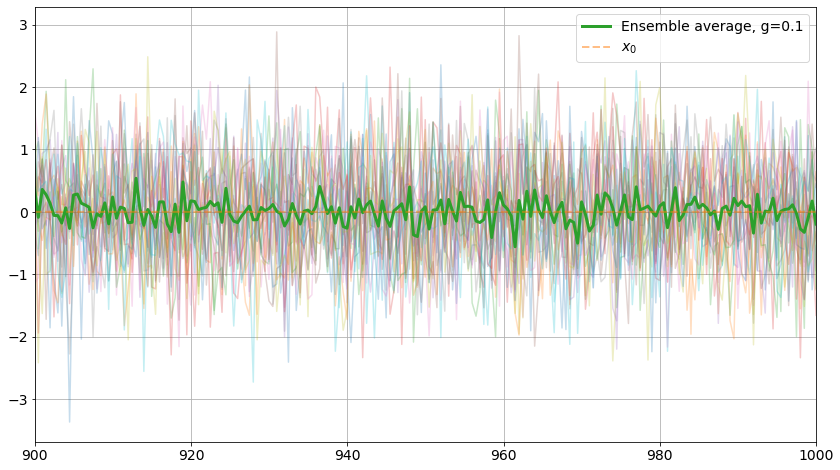

In [54]:
fig, ax = plt.subplots(figsize=(14,8))
for g in gs:
    for n in range(N):
        ax.plot(ts, x_xi[n, :], alpha=0.25)
ax.plot(ts, x_xi.mean(axis=0), c='C2', linewidth=3, label=f'Ensemble average, g={g}')
ax.plot(ts, x0, c='C1', linewidth=2, alpha=0.5, linestyle='--', label=r'$x_0$')

ax.grid()
ax.legend(loc='best')
ax.set_xlim(900,1000)